# Gradient-based solver for ridge regression

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [4]:
def generate_data(n):
    d = 100
    w = np.zeros(d)
    for i in range(0,10):
        w[i] = 1.0
    #
    trainx = np.random.normal(size=(n,d))
    e = np.random.normal(size=(n))
    trainy = np.dot(trainx, w) + e
    #
    return trainx, trainy

## 2. Gradient descent solver for ridge regression

In [37]:
p, q = generate_data(200)
print(p.shape,q.shape)
o = np.zeros(101)
np.dot(p, o).shape

(200, 101) (200,)


(200,)

In [39]:
r = np.zeros(101)

In [57]:
np.dot(w,w).shape

()

In [45]:
( (q - np.dot(p,r))).shape #+ 2*C*w))

(200,)

In [44]:
p.T.shape

(101, 200)

In [83]:
def ridge_regression_GD(x,y,C):
    
    step = 0.0001
    losses = []
    w = np.zeros(101)
    x = np.c_[x, np.ones(x.shape[0])]
#     criterion = np.ones(len(w))*0.01 
    OLF = np.dot((y - np.dot(x,w)).T,(y - np.dot(x,w)))
    L1 = OLF + C*np.dot(w,w)
    
    while True:      
        Nabla = (-2 * np.dot(x.T, (y - np.dot(x,w))) + 2*C*w)
        w -= step*Nabla
        L2 = OLF + C*np.dot(w,w)
        losses += [L1 - L2]
#         print(losses) 
        if abs(L1 - L2) < 0.0000000001:
            break
        L1 = L2
        if len(losses) == 50:
            step = 0.00001
        if len(losses) == 200:
            step = 0.000001
    b = w[-1]
    w = w[:-1]
    print(len(losses))
    return w,b,losses

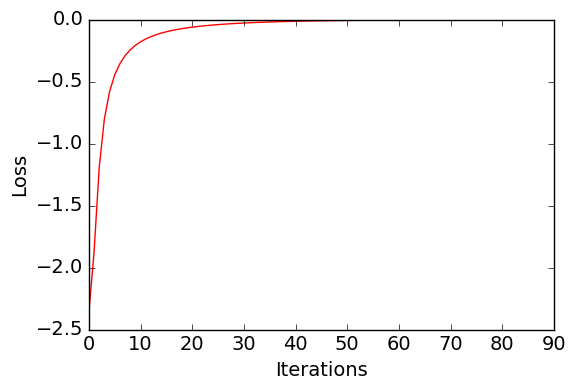

In [52]:
# Generate 200 data points
n = 200
x,y = generate_data(n)
# Set regularization constant
C = 1.0
# Run gradient descent solver
w, b, losses = ridge_regression_GD(x,y,C)
# Plot the losses
plt.plot(losses,'r')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()

In [43]:
def compute_mse(w,b,x,y):
    residuals = y - (np.dot(x, w) + b)
    return np.dot(residuals, residuals)/n

In [84]:
# Generate 200 data points
#n = 200
#x,y = generate_data(n)
# Set regularization constant
C = 10.0
# Run gradient descent solver and compute its MSE
w, b, losses = ridge_regression_GD(x,y,C)
# Use built-in routine for ridge regression and compute MSE
regr = linear_model.Ridge(alpha=C)
regr.fit(x, y)
# Print MSE values and L2 distance between the regression functions
print ("MSE of gradient descent solver: ", compute_mse(w,b,x,y))
print ("MSE of built-in solver: ", mean_squared_error(regr.predict(x), y))
print ("Distance between w-coefficients: ", np.linalg.norm(w-regr.coef_))

238274
MSE of gradient descent solver:  0.727510658355
MSE of built-in solver:  0.727490039963
Distance between w-coefficients:  0.000803950850576


In [85]:
w

array([  8.40662277e-01,   8.98187941e-01,   7.92205814e-01,
         1.04008343e+00,   9.30628913e-01,   7.69060341e-01,
         9.19196860e-01,   9.41882049e-01,   9.12622889e-01,
         1.02637872e+00,  -3.61935903e-02,  -5.03221635e-02,
         6.81216082e-02,   1.49381151e-02,  -9.80519552e-02,
        -2.16025085e-02,   7.59347882e-02,   1.02972419e-01,
         1.14885185e-02,   2.29581093e-02,   3.90613971e-02,
        -1.04754144e-01,  -4.45194893e-03,   1.00414168e-01,
        -2.17035677e-02,   5.89343195e-02,  -7.43559145e-02,
        -1.79861528e-02,   3.90611196e-02,   6.17466364e-03,
        -7.26809658e-02,   1.41292381e-01,   1.59978620e-01,
        -2.22937748e-01,   7.81492350e-02,  -4.04727833e-02,
         2.69250820e-02,   8.19089785e-02,   6.64175780e-02,
        -3.84083820e-02,  -1.52297439e-01,   1.46486904e-01,
        -1.66948452e-01,   2.64868878e-02,  -1.77729375e-02,
         2.75297459e-02,  -1.33302728e-01,   5.04744606e-02,
         8.53869494e-02,

In [88]:
ind = np.argpartition(regr.coef_, -10)[-10:]

In [89]:
ind

array([5, 2, 0, 6, 4, 7, 9, 3, 1, 8], dtype=int64)

In [36]:
tw = np.zeros(100)
for i in range(10):
    tw[i] = 1.0

In [80]:
print ("my and built-in Distance between w-coefficients: ", np.linalg.norm(w-regr.coef_))
print ("my and true Distance between w-coefficients: ", np.linalg.norm(w-tw))
print ("built-in and true between w-coefficients: ", np.linalg.norm(tw-regr.coef_))

my and built-in Distance between w-coefficients:  0.000803949993865
my and true Distance between w-coefficients:  0.85016038952
built-in and true between w-coefficients:  0.850155798656
